# Laboratorio No. 2 - Regresión Lineal

Adjunto a este NoteBook encontrarán el archivo *Autos-csv* que contiene datos sobre automóviles de segunda mano.  El objetivo principal de este ejercicio es desarrollar un modelo que permita, en base a las características (features) que tiene el archivo, predecir el costo de un vehículo usado.

A diferencia de la mayoría de ejercicios, este archivo no ha sido depurado, es decir los datos son crudos (raw).  Esto quiere decir que antes de trabajar sobre un modelo predictivo, deben realizar el proceso total, desde limpieza de datos, exploración inicial, etc.

A continuación encontrarán que hay encabezados que bien podrían ayudarlos a desarrollar el código requerido.  Estos están a manera de sugerencia únicamente y Ustedes decidirán si los usan, modifican, eliminan, agregan a los mismos

## Importar las librerías relevantes

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

%matplotlib inline

## Cargar los datos crudos

In [111]:
carros = pd.read_csv("Autos.csv")

In [112]:
carros.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocesamiento

In [113]:
carros = clean(carros, method = "standardize")

### Explorar las estadísticas descriptivas de las variables

In [75]:
profile = ProfileReport(carros)
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [76]:
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4345 non-null   object 
 1   price         4173 non-null   float64
 2   body          4345 non-null   object 
 3   mileage       4345 non-null   int64  
 4   enginev       4195 non-null   float64
 5   engine_type   4345 non-null   object 
 6   registration  4345 non-null   object 
 7   year          4345 non-null   int64  
 8   model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [77]:
carros.describe()

,price,mileage,enginev,year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


### Majeno de variables de interes

Se utilizaran todas las variables menos la de modelo ya que es dificil crear variables dummies para esa variable.

In [114]:
carros = clean(carros, method = 'dropcols', columns = ['model'])
carros.head()

,brand,price,body,mileage,enginev,engine_type,registration,year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


<AxesSubplot:>

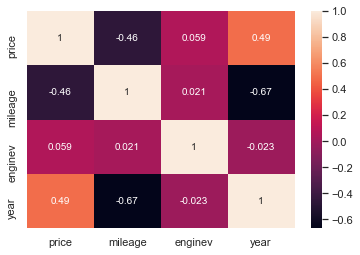

In [115]:
sns.heatmap(carros.corr(), annot=True)

### Manejo de valores faltantes

<AxesSubplot:>

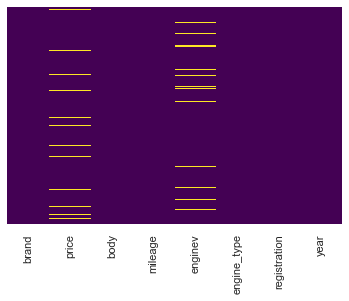

In [116]:
sns.heatmap(carros.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [117]:
#carros = clean(carros, method = "dropmissing")
carros = clean(carros, method = "fillmissing")

### Exploración de las Funciones de Distribución de Probabilidades (PDFs por sus siglas en inglés)

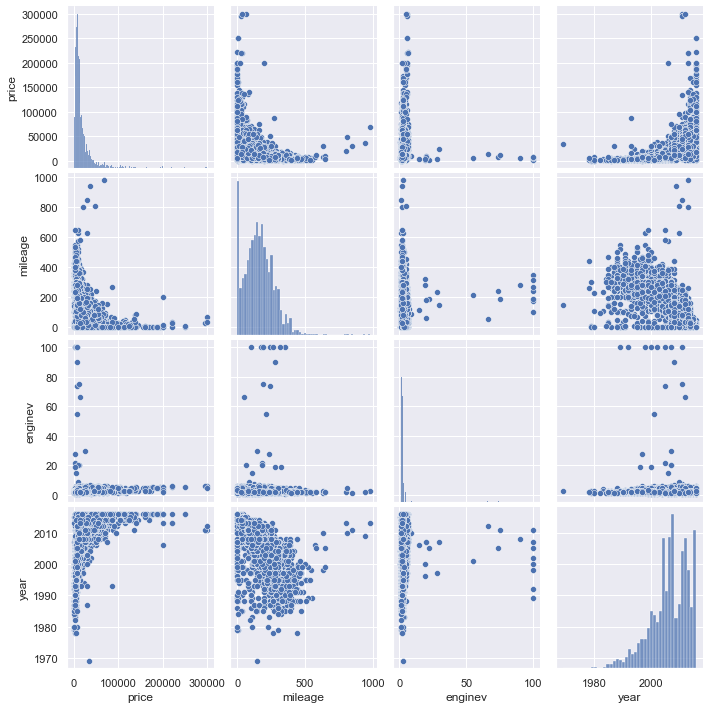

In [118]:
sns.pairplot(carros)

### Exploracion de datos categoricos

Bar Plot of registration


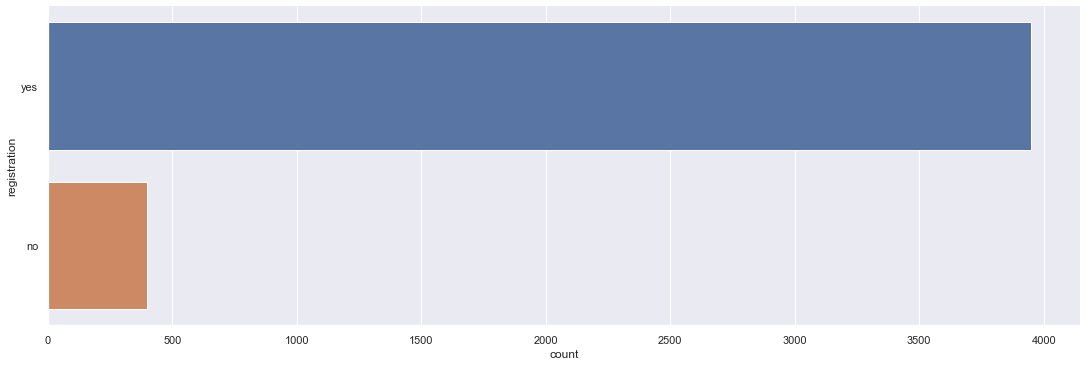

Summary of registration


,count,relative_pct
yes,3947,0.91
no,398,0.09


In [83]:
eda_cat(carros, x = "registration") #Precio #engine

Bar Plot of brand


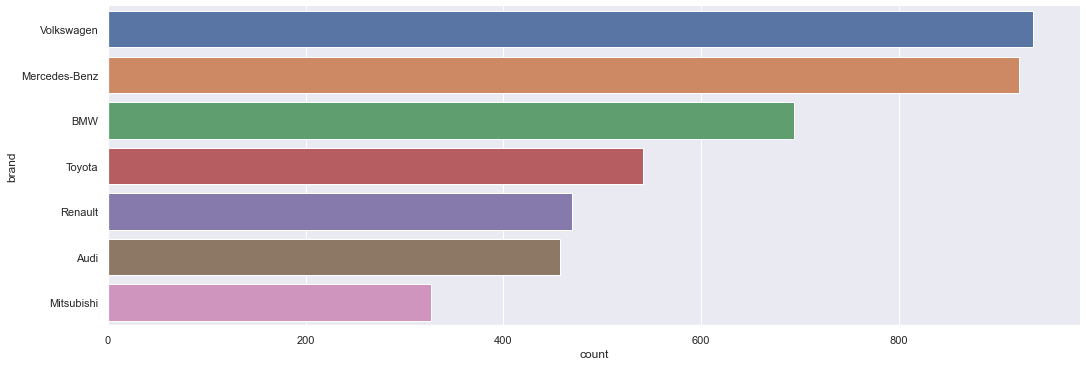

Summary of brand


,count,relative_pct
Volkswagen,936,0.22
Mercedes-Benz,921,0.21
BMW,694,0.16
Toyota,541,0.12
Renault,469,0.11
Audi,457,0.11
Mitsubishi,327,0.08


In [84]:
eda_cat(carros, x = "brand") #Precio #engine

Bar Plot of body


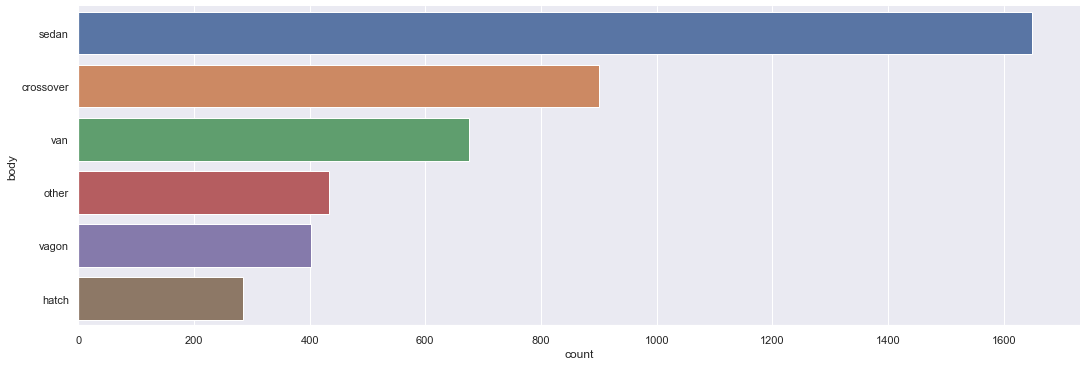

Summary of body


,count,relative_pct
sedan,1649,0.38
crossover,901,0.21
van,675,0.16
other,433,0.10
vagon,402,0.09
hatch,285,0.07


In [54]:
eda_cat(carros, x = "body") #Precio #engine

Bar Plot of engine_type


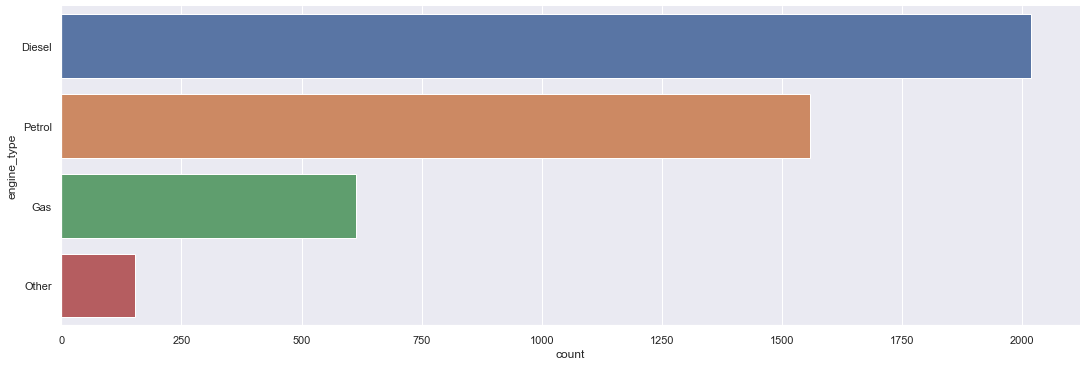

Summary of engine_type


,count,relative_pct
Diesel,2019,0.46
Petrol,1559,0.36
Gas,613,0.14
Other,154,0.04


In [55]:
eda_cat(carros, x = "engine_type") #Precio #engine

Bar Plot of brand


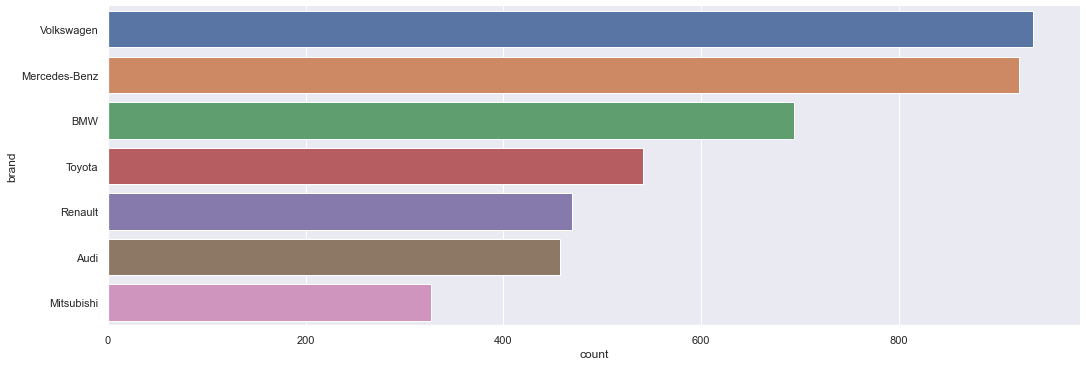

Summary of brand


,count,relative_pct
Volkswagen,936,0.22
Mercedes-Benz,921,0.21
BMW,694,0.16
Toyota,541,0.12
Renault,469,0.11
Audi,457,0.11
Mitsubishi,327,0.08


In [85]:
eda_cat(carros, x = "brand") #Precio #engine

### Analisis de datos cuantitativos

Outlier Analysis - Boxplot


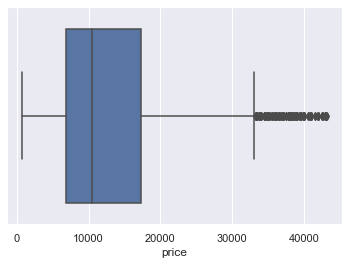

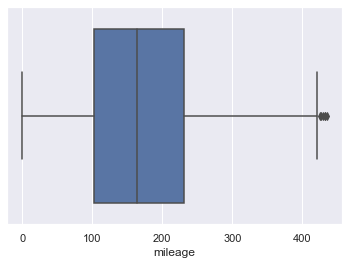

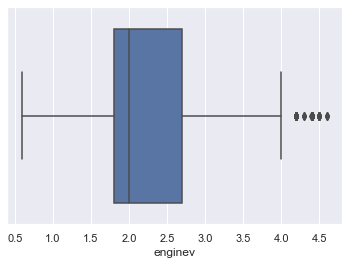

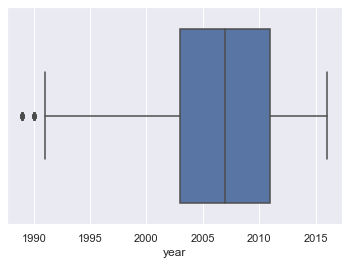

Distribution Analysis - Histogram


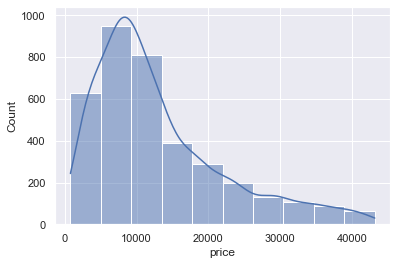

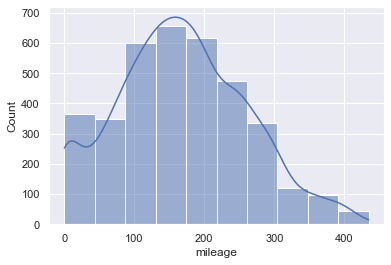

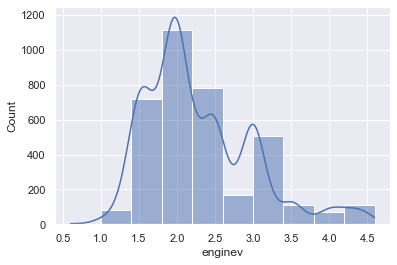

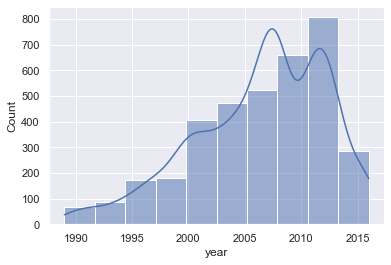

In [87]:
eda_num(carros)

### Manejo de valores atípicos (outliers)

In [119]:
carros = clean(carros, method="outliers", 
      columns=[])

## Revisando los supuestos para OLS

### Relajamiento de los supuestos

### Multicolinealidad

<AxesSubplot:>

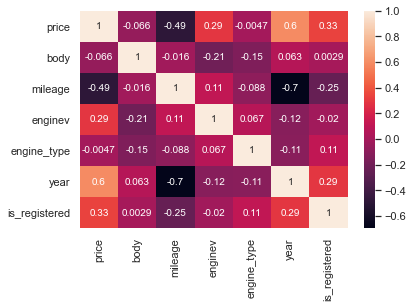

In [130]:
sns.heatmap(carros.corr(), annot=True)

## Crear variables comodín (Dummy)

In [120]:
registered = pd.get_dummies(carros['registration'],drop_first=True)
carros.drop(['registration'],axis=1,inplace=True)

In [121]:
carros = pd.concat([carros,registered],axis=1)

In [122]:
carros = clean(carros, method = "replaceval",       
      columns = ["engine_type"],     #  Si no se dan columnas, lo hace en todas
      to_replace = ["Diesel", "Petrol", "Gas", "Other"],  # Si no se da el valor que debe ser reemplazado, no cambia nada
      value = [0, 1, 2, 3])

In [123]:
carros = clean(carros, method = "replaceval",       
      columns = ["body"],     #  Si no se dan columnas, lo hace en todas
      to_replace = ["sedan", "crossover", "van", "vagon", "hatch", "other"],  # Si no se da el valor que debe ser reemplazado, no cambia nada
      value = [0,1,2,3,4,5])

In [128]:
carros = clean(carros, method = "replaceval",       
      columns = ["brand"],     #  Si no se dan columnas, lo hace en todas
      to_replace = ["Volskwagen", "Mercedes-Benz", "BMW", "Toyota", "Renault", "Audi", "Mitsubishi"],  # Si no se da el valor que debe ser reemplazado, no cambia nada
      value = [0,1,2,3,4,5,6])

In [124]:
carros = carros.rename(columns={'yes': 'is_registered'})

In [129]:
carros.head()

,brand,price,body,mileage,enginev,engine_type,year,is_registered
0,2,4200.0,0,277,2.0,1,1991,1
1,1,7900.0,2,427,2.9,0,1999,1
3,5,23000.0,1,240,4.2,1,2007,1
4,3,18300.0,1,120,2.0,1,2011,1
7,5,14200.0,3,200,2.7,0,2006,1


### Re-ordenar un poco

In [131]:
price = carros.price
carros.drop(['price'],axis=1,inplace=True)
carros = pd.concat([price,carros],axis=1)
carros.head()

,price,brand,body,mileage,enginev,engine_type,year,is_registered
0,4200.0,2,0,277,2.0,1,1991,1
1,7900.0,1,2,427,2.9,0,1999,1
3,23000.0,5,1,240,4.2,1,2007,1
4,18300.0,3,1,120,2.0,1,2011,1
7,14200.0,5,3,200,2.7,0,2006,1


## Modelo de regresión lineal

### Declarar las entradas y las metas

### Escalar (poner a escala) los datos

### Divisón del df completo en datos de entrenamiento y de prueba (Train Test Split)

### Crear la regresión

### Encontrar R^2 del modelo

Nótese que este no es el R^2 ajustado.  En otras palabras hay que encontrar el R^2 ajustado para tener una medida más adecuada

### Fórmula para R^2 Ajustado

$R^2_{ajust.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

n = número de observaciones

p = número de predictores

### Encontrar los pesos (coeficientes) y el sesgo (intercepto)

## Prueba del modelo

### Conclusiones
